In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Задание 1

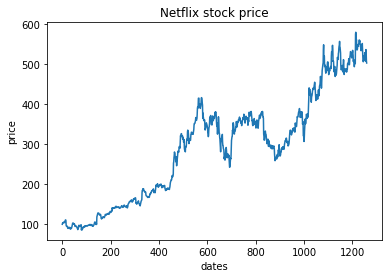

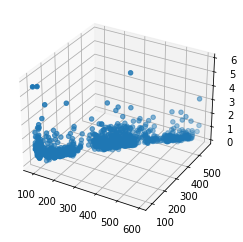

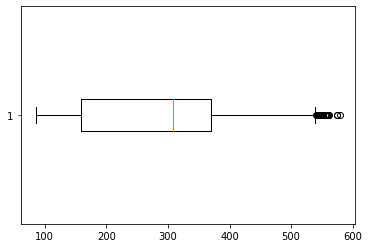

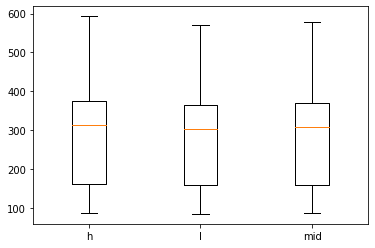

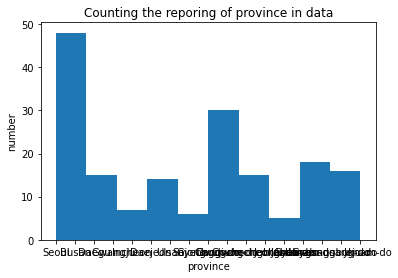

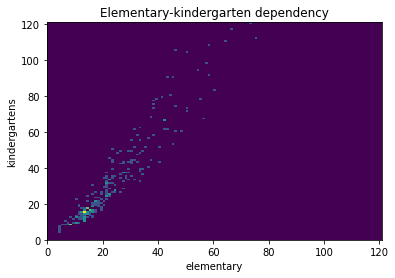

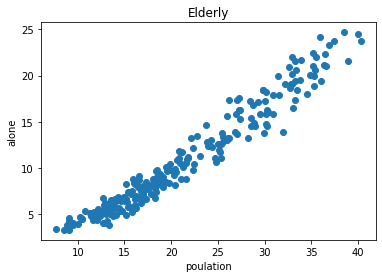

In [3]:
df=pd.read_csv('data\\Netflix_Historical_StockPrice2.csv')
df1 = pd.DataFrame.from_records(df, columns=['Date','High', 'Low','Volume'])
df1 = df1.rename(columns={'High':  'h','Low': 'l','Date':'d','Volume':'v'},inplace=False)
x=[]
for i in range(len(df1['l'])):
    x.append((df1['l'][i]+df1['h'][i])/2)

df1 = df1.assign(mid=x)
plt.plot(df1.mid)
plt.title('Netflix stock price')
plt.xlabel('dates')
plt.ylabel('price')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(df1.h, df1.l, df1.v)
plt.show()

plt.boxplot(df1.mid, vert=False, whis=0.8)
plt.show()

df1.pop('d')
df1.pop('v')
plt.boxplot(df1,labels=df1.columns)
plt.show()


df=pd.read_csv('data\\case.csv')
df1 = pd.DataFrame.from_records(df, columns=['province','confirmed'])
df1 = df1.rename(columns={'province':  'p','confirmed': 'c'},inplace=False)
plt.hist(df1.p)
plt.title('Counting the reporing of province in data')
plt.xlabel('province')
plt.ylabel('number')
plt.show()




df=pd.read_csv('data\\Region.csv')
df1 = pd.DataFrame.from_records(df, columns=['elementary_school_count','kindergarten_count','elderly_population_ratio','elderly_alone_ratio'])
df1 = df1.rename(columns={'elementary_school_count':  'e', 'kindergarten_count': 'k',
                          'elderly_population_ratio':'popul','elderly_alone_ratio':  'alone'},inplace=False)
df1.fillna(0, inplace=True)
a=[]
for i in range(int(len(df1.k)/2)):
    a.append(i)
plt.hist2d(df1.e,df1.k,bins=a)
plt.title('Elementary-kindergarten dependency')
plt.xlabel('elementary')
plt.ylabel('kindergartens')
plt.show()


df1.fillna(0, inplace=True)
plt.scatter(df1.popul,df1.alone)
plt.title('Elderly')
plt.xlabel('poulation')
plt.ylabel('alone')
plt.show()

Задание 2

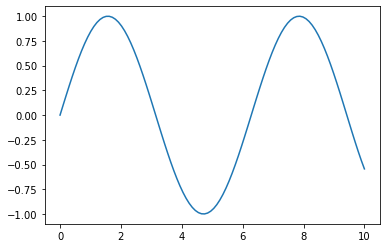

In [ ]:
from scipy.interpolate import pchip_interpolate
from scipy.interpolate import barycentric_interpolate

x1=np.linspace(0.0,10.0,11)
y1=np.sin(x1)

# Барицентрическая интерполяция
ze=np.linspace(min(x1),max(x1),num=100)
spl = barycentric_interpolate(x1,y1,ze)
plt.plot(ze,spl,label="barycentric interpolation")
plt.show()


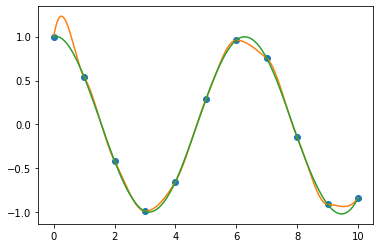

In [ ]:
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class monospline:
    def __init__(self, x, y):
        self.x = np.array(x)
        self.a = np.array(y)
        self.b = self.recount(self.x, np.array(y))
        self.c = (3 *((np.array(y)[1:] - np.array(y)[:-1]) / (self.x[1:] - self.x[:-1])) - self.b[1:] - 2 * self.b[:-1]) / (self.x[1:] - self.x[:-1])
        self.d = (self.b[1:] + self.b[:-1] - 2 *((np.array(y)[1:] - np.array(y)[:-1]) / (self.x[1:] - self.x[:-1]))) / ((self.x[1:] - self.x[:-1])**2)

    def evaluate(self, t):
        result = []
        for j in range(len(t)):
            i = min(np.where(t[j] >= self.x)[0][-1], self.x.size-2)
            res = self.a[i]+ (t[j] - self.x[i])*self.b[i]+ ((t[j] - self.x[i])**2)*self.c[i] + ((t[j] - self.x[i])**3)*self.d[i]
            result.append(res)
        return result

    def recount(self, t, r):
        b = np.empty(self.x.size)
        arr=(np.array(self.a)[1:] - np.array(self.a)[:-1]) / (self.x[1:] - self.x[:-1])
        for i in range(1, self.x.size - 1):
            if (arr[i - 1]*arr[i]) > 0:
                y=3*arr[i-1]*arr[i]
                rmax=max(arr[i-1], arr[i])
                rmin=min(arr[i-1], arr[i])
                b[i]=y/(rmax + 2*rmin)
                tr=0
                if arr[i] > 0:
                    tr=max(tr,b[i])
                    rt=min(arr[i-1], arr[i])
                    b[i] = min(3*rt,tr)
                if arr[i] < 0:
                    tr=min(tr,b[i])
                    rt=max(arr[i-1], arr[i])
                    b[i] = max(3*rt,tr)
            else:
                b[i]=0
                
        b[0] = ((2 * (self.x[1:] - self.x[:-1])[0] + (self.x[1:] - self.x[:-1])[1]) *(self.x[1:] - self.x[:-1])[0] - (self.x[1:] - self.x[:-1])[0] * arr[1]) / ((self.x[1:] - self.x[:-1])[0] + (self.x[1:] - self.x[:-1])[1])
        b[self.x.size - 1] = ((2 * (self.x[1:] - self.x[:-1])[self.x.size - 2] + (self.x[1:] - self.x[:-1])[self.x.size - 3]) * arr[self.x.size - 2]- (self.x[1:] - self.x[:-1])[self.x.size - 2] * arr[self.x.size - 3]) / ((self.x[1:] - self.x[:-1])[self.x.size - 2]
                                                                                                     + (self.x[1:] - self.x[:-1])[self.x.size - 3])
          
        return b

    


x1=np.linspace(0.0,10.0,11)
y1=np.cos(x1)
plt.plot(x1, y1, 'o')

intrp = monospline(x1, y1)
x = np.linspace(min(x1), max(x1), 5000)
y = intrp.evaluate(x)
plt.plot(x, y)


intrp = CubicSpline(x1, y1)
plt.plot(x, intrp(x))
plt.show()






Задание 3




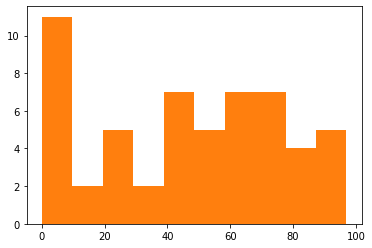

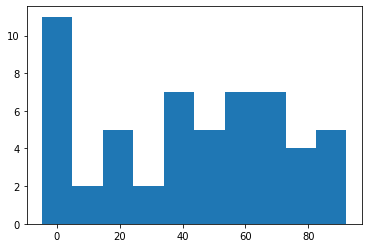

In [5]:
import random

def his(arr,a):
    mi=min(arr)
    ma=max(arr)
    h=(ma-mi)
    coef=h/a
    b=np.zeros(a)

    for i in range(len(arr)):
        num =int((arr[i]-mi)/coef)
        b[min(num,a-1)]+=1
        
    c=np.arange(mi,ma,coef)
    #print(c,b)
    return b,c

a = [0.2,0.2,0.1,0.5,1.8]
#a=[]
for i in range(50):
    a.append(random.randint(1,100))

#start_time = time.time()
bins=10
value_counts = plt.hist(a, bins,width=0.9)
plt.hist(a)
plt.show()
#print("--- %s seconds ---" % (time.time() - start_time))

#--- 0.1678144931793213 seconds ---

#start_time = time.time()
#d=hi(a)
#sorted_tuple = sorted(d.items(), key=lambda x: x[0])
#d=dict(sorted_tuple)

#numbers = list(d.keys())
#amountOfNumbers= list(d.values())


#--- 0.12401819229125977 seconds ---
a.sort()
b,c = his(a,bins)
plt.bar(c,b,(c[0]-c[-1])/(len(c)-1))
plt.show()
